In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


# 1. 데이터셋

In [2]:
# 자주 나타나는 단어 100개
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(path='imdb.npz', num_words=10000)

# 2. 데이터 준비

In [3]:
# word_index
word_index = imdb.get_word_index() # 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
# 각 위치에 있으면 1로 변환한다.
# binary encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 3. 신경망 모델 만들기

고려할 사항

1. 얼마나 많은 층을 쌓을 것인가.
2. 각 층에 얼마나 많은 은닉 유닛을 둘 것인가.

여기에서는 2층의 16개 UNIT을 둔다.

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()

# 10000 feature 차원수
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
from keras.optimizers import RMSprop
from keras import losses
from keras import metrics

model.compile(optimizer=RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

# 4. 검증 세트 준비하기

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 266us/step - loss: 0.5314 - binary_accuracy: 0.7934 - val_loss: 0.4411 - val_binary_accuracy: 0.8221
Epoch 2/20
15000/15000 [==============================] - 3s 224us/step - loss: 0.3245 - binary_accuracy: 0.9039 - val_loss: 0.3156 - val_binary_accuracy: 0.8855
Epoch 3/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.2315 - binary_accuracy: 0.9286 - val_loss: 0.2834 - val_binary_accuracy: 0.8890
Epoch 4/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.1795 - binary_accuracy: 0.9455 - val_loss: 0.2891 - val_binary_accuracy: 0.8851
Epoch 5/20
15000/15000 [==============================] - 3s 230us/step - loss: 0.1442 - binary_accuracy: 0.9545 - val_loss: 0.2875 - val_binary_accuracy: 0.8838
Epoch 6/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.1209 - binary_accuracy: 0.9642 - val_loss: 0.3049 - val_bi

- epoch이 2에서 수렴

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'loss', 'val_binary_accuracy', 'binary_accuracy'])

### plot

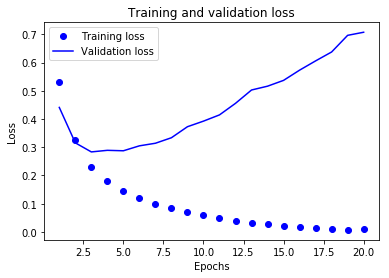

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

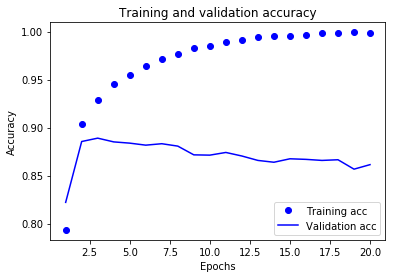

In [26]:
# 그래프 초기화
plt.clf()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# 5. 훈련된 모델로 새로운 데이터에 대해 예측

In [28]:
y_pred = model.predict(x_test)

In [35]:
y_pred = np.round(y_pred).reshape(-1)

In [36]:
print(y_test.shape, y_pred.shape)

(25000,) (25000,)


In [37]:
np.mean(y_test == y_pred)

0.85248000000000002

# 6. 추가 실험

In [40]:
model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.1), metrics=['acc'])
model.fit(partial_x_train, 
          partial_y_train, 
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 287us/step - loss: 0.9037 - acc: 0.5002 - val_loss: 0.9269 - val_acc: 0.4997
Epoch 2/20
15000/15000 [==============================] - 4s 260us/step - loss: 0.7803 - acc: 0.4986 - val_loss: 0.6791 - val_acc: 0.4997
Epoch 3/20
15000/15000 [==============================] - 4s 254us/step - loss: 0.7439 - acc: 0.5715 - val_loss: 0.4583 - val_acc: 0.8125
Epoch 4/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.4942 - acc: 0.7723 - val_loss: 0.4079 - val_acc: 0.8458
Epoch 5/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.3771 - acc: 0.8548 - val_loss: 0.4162 - val_acc: 0.8431
Epoch 6/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.3185 - acc: 0.8791 - val_loss: 0.3369 - val_acc: 0.8674
Epoch 7/20
15000/15000 [==============================] - 4s 241us/step - loss: 0.2896 - acc: 0.8856 - val_loss: 0.4347 - 

- epoch 6에서 수렴

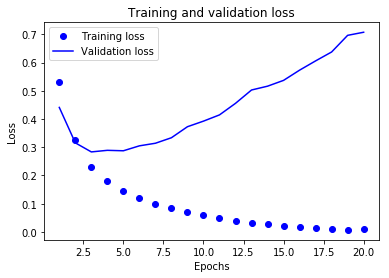

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

fig = plt.subplots()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

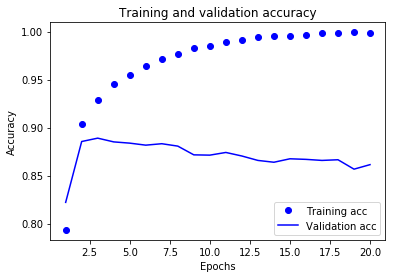

In [44]:
# 그래프 초기화
plt.clf()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# 7. 정리

1. 원본 데이터를 텐서로 주입하기 위해 전처리가 필요하다.
2. relu 활성화
3. 이진 분류 문제는 sigmoid 활성화 함수를 가진 Dense로 끝나야 한다.
4. 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy
5. rmsprop 옵티마이저는 일반적으로 좋다.
6. overfitting을 조심해야 한다.